# Monte Carlo Solution

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import pandas as pd

random.seed(101)

## Coordinates and distance matrix generation

In [2]:
def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(num_cities)]

def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])
            matrix[i][j] = matrix[j][i] = dist
    return matrix

## Helper Functions

In [3]:
def calculate_tour_length(path, distance_matrix):
    length = 0
    for i in range(len(path) - 1):
        length += distance_matrix[path[i]][path[i + 1]]
    length += distance_matrix[path[-1]][path[0]]  # powrót do miasta startowego
    return length


def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', label='Monte Carlo Path', color='blue')

    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Monte Carlo Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()

# Monte Carlo Algorithm Implementation

In [4]:
def monte_carlo_tsp(distance_matrix, iterations=10000):
    num_cities = len(distance_matrix)
    best_path = None
    best_cost = float('inf')

    for _ in range(iterations):
        path = list(range(num_cities))
        random.shuffle(path)
        cost = calculate_tour_length(path, distance_matrix)
        if cost < best_cost:
            best_cost = cost
            best_path = path[:]
    
    best_path.append(best_path[0])  # zamknięcie cyklu
    return best_path, best_cost


## Batch Experiments (10–100 cities, 100 trials each)

In [5]:
trials_per_size = 100
iterations = 10000  
results = []

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    for trial in range(trials_per_size):
        random.seed(101)
        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        start_time = time.time()
        path, cost = monte_carlo_tsp(distance_matrix, iterations=iterations)
        end_time = time.time()

        times.append(end_time - start_time)
        lengths.append(cost)

    results.append({
        "Number of Cities": num_cities,
        "Avg Total Length": sum(lengths) / trials_per_size,
        "Avg Time (s)": sum(times) / trials_per_size
    })

df = pd.DataFrame(results)
df.to_csv("monte_carlo_tsp_avg_results.csv", index=False)


KeyboardInterrupt: 

## Plotting Results: Execution Time and Tour Length

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
plt.title("Average Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Time (seconds)")
plt.grid(True)
plt.savefig("mc_tsp_avg_time.png", dpi=100, bbox_inches='tight')

plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
plt.title("Total length vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Tour Length")
plt.grid(True)
plt.savefig("mc_tsp_avg_length.png", dpi=100, bbox_inches='tight')


### Example: Best Tour for 25 Cities

Path: [24, 1, 13, 7, 8, 15, 12, 20, 0, 16, 22, 19, 18, 11, 3, 9, 4, 10, 2, 23, 5, 17, 21, 6, 14, 24]
Total cost: 838.5329222824539
Time taken: 0.452143 seconds


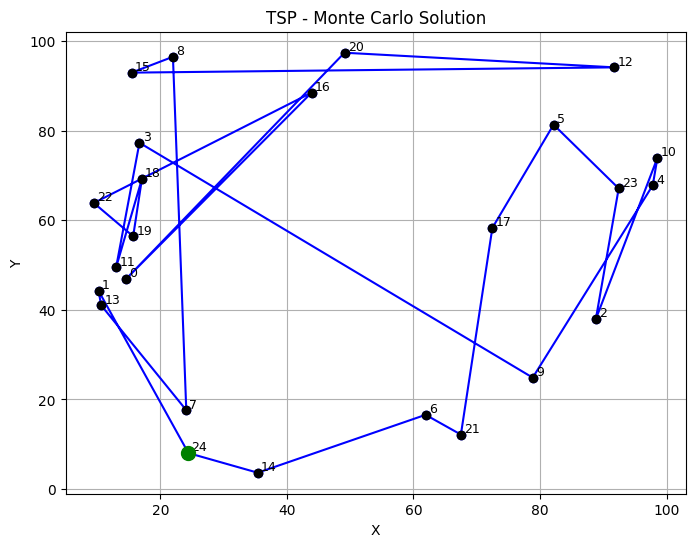

In [18]:
num_cities = 25
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = monte_carlo_tsp(distance_matrix, iterations=100000)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename='25_MC.png')


## Example: Best Tour for 50 cities

Path: [43, 41, 22, 28, 36, 24, 23, 20, 29, 1, 49, 19, 30, 12, 9, 40, 39, 33, 13, 32, 21, 46, 15, 34, 7, 4, 2, 17, 48, 18, 31, 0, 26, 25, 3, 11, 35, 45, 37, 10, 14, 6, 38, 8, 42, 47, 16, 44, 5, 27, 43]
Total cost: 1855.379131051801
Time taken: 4.028809 seconds


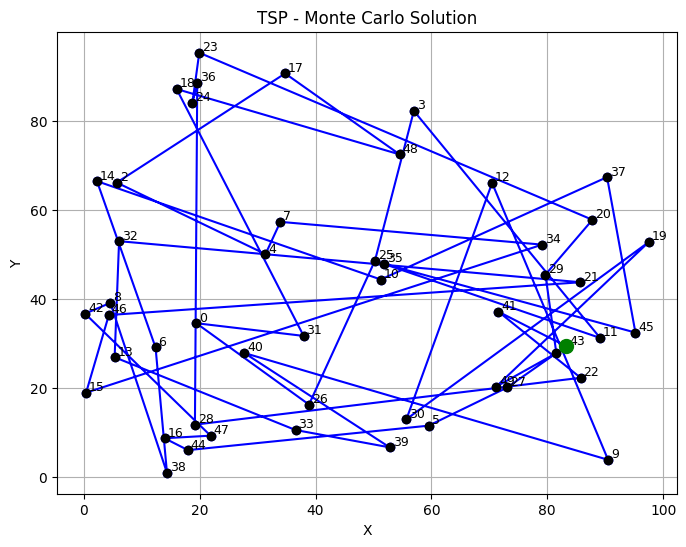

In [27]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = monte_carlo_tsp(distance_matrix, iterations=500000)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename='50_MC.png')
